<font size="6"><strong><center><center></strong></font>

# Employee Turnover Analytics.
### Course-end Project 4

### DESCRIPTION

Project Statement: 

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level. 

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.  

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period. 

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to 

Perform data quality check by checking for missing values if any. 

Understand what factors contributed most to employee turnover by EDA. 

Perform clustering of Employees who left based on their satisfaction and evaluation. 

Handle the left Class Imbalance using SMOTE technique. 

Perform k-fold cross-validation model training and evaluate performance.  

Identify the best model and justify the evaluation metrics used.  

Suggest various retention strategies for targeted employees. 

 

In [7]:
# De-facto imports
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
plt.rcParams['figure.figsize'] = (12,8)

In [10]:
emp = pd.read_csv('/content/drive/MyDrive/Projects/Employee-Turnover-using-ML-Trees-Forests-master/employee_data.csv')
emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas_profiling

In [13]:
profile = pandas_profiling.ProfileReport(emp)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

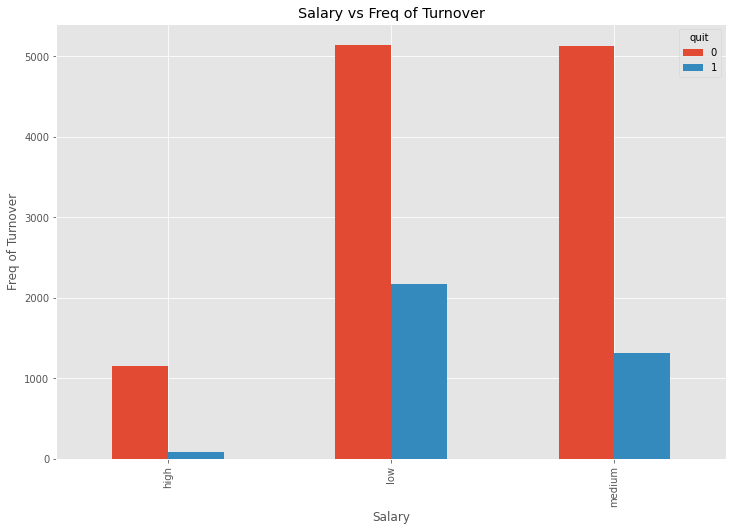

In [14]:
pd.crosstab(emp.salary, emp.quit).plot(kind="bar")
plt.title("Salary vs Freq of Turnover")
plt.xlabel("Salary")
plt.ylabel("Freq of Turnover")
plt.show()

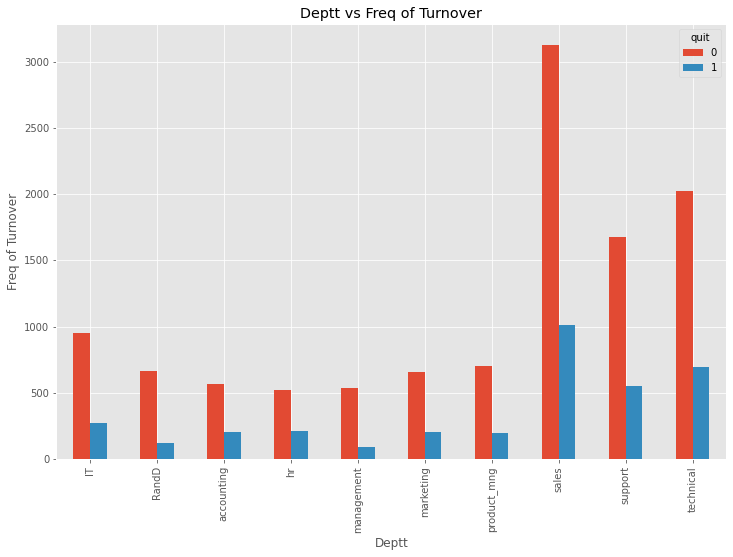

In [15]:
pd.crosstab(emp.department, emp.quit).plot(kind="bar")
plt.title("Deptt vs Freq of Turnover")
plt.xlabel("Deptt")
plt.ylabel("Freq of Turnover")
plt.show()

In [16]:
# to convert categorical variable into dummy/indicator variables
vars = ['salary', 'department']
for var in vars:
  # use prefix so that IT is names as department_IT
  ls = pd.get_dummies(emp[var],prefix=var)
  emp = emp.join(ls)

In [17]:
emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# axis=1 is for vertical
emp.drop(vars,axis=1,inplace=True)

In [19]:
from yellowbrick.target import ClassBalance

# Class Imbalance
Even if all parameters fine, accuracy may be compromised if the train and test data don't come from same distribution.<br>
E.g. If in training 90% employees quit the job and in test data only 40% did, then in prediction on test data, our model is surely gonna tell >40%. Hence less accuracy.

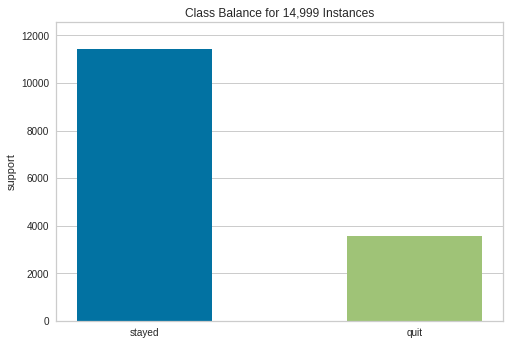

In [20]:
# 0=stayes, 1=quit
visualizer = ClassBalance(labels=['stayed','quit']).fit(emp.quit)
visualizer.poof()

In [21]:
X,y = emp.loc[:,emp.columns!='quit'], emp.quit

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,train_size=0.8,stratify=y)

**Decision Trees**

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [28]:
@interact
def plot_tree(criteria=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=25,value=2, continuous_update=True),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=True),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=True)):
  model = DecisionTreeClassifier(random_state=101, criterion=criteria,splitter=split,max_depth=depth,min_samples_leaf=min_leaf,min_samples_split=min_split)
  model.fit(X_train,y_train)
  print("Decision tree accuracy on X_test {:.3f}".format(accuracy_score(y_test,model.predict(X_test))))
  # visualizer
  graph = Source(tree.export_graphviz(model,filled=True,feature_names=X_train.columns,class_names=['Stayed','quit']))
  display(Image(data=graph.pipe(format='png')))
  return model
    

interactive(children=(Dropdown(description='criteria', options=('gini', 'entropy'), value='gini'), Dropdown(de…

**Random Forests**<br>
Decision trees tend to overfit(high variance problem). So we use forests so as to trade-off bias for variance.
* Randomization and averaging (multiple trees) leads to less variance.
* Bootstrapping is used to reduce training time & memory consumption.
* Implementation are parallelizable. So we can use multiple CPU cores simultaneously.

In [29]:
@interact
def plot_tree_rf(criteria=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=25,value=2, continuous_update=True),
                 forests=IntSlider(min=1,max=150,value=75,continuous_update=True),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=True),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=True)):
  model = RandomForestClassifier(random_state=101, criterion=criteria,bootstrap=bootstrap,n_estimators=forests,max_depth=depth,min_samples_split=min_split,min_samples_leaf=min_leaf,n_jobs=1,verbose=False)
  model.fit(X_train,y_train)
  print("Random forest accuracy on X_test {:.3f}".format(accuracy_score(y_test,model.predict(X_test))))
  # visualizer for one of the trees
  specific_tree = model.estimators_[0]
  graph = Source(tree.export_graphviz(specific_tree,filled=True,feature_names=X_train.columns,class_names=['Stayed','quit']))
  display(Image(data=graph.pipe(format='png')))
  return model



interactive(children=(Dropdown(description='criteria', options=('gini', 'entropy'), value='gini'), Dropdown(de…

**Important Features**

In [30]:
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from yellowbrick.model_selection import FeatureImportances

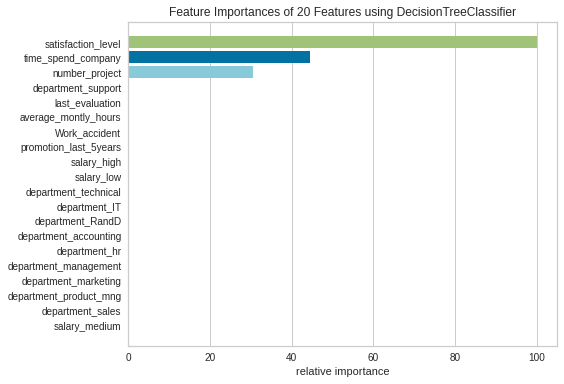

In [37]:
dtc = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=101, splitter='best')
fi = FeatureImportances(dtc)
fi.fit(X_train,y_train)
fi.show()


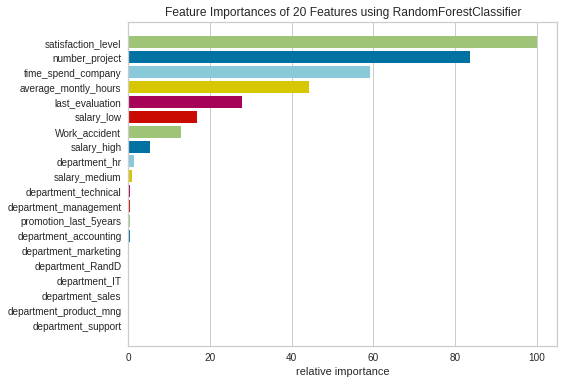

In [39]:
rfc = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
                       oob_score=False, random_state=101, verbose=False,
                       warm_start=False)
fi = FeatureImportances(rfc)
fi.fit(X_train,y_train)
fi.show()

[ROC AUC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

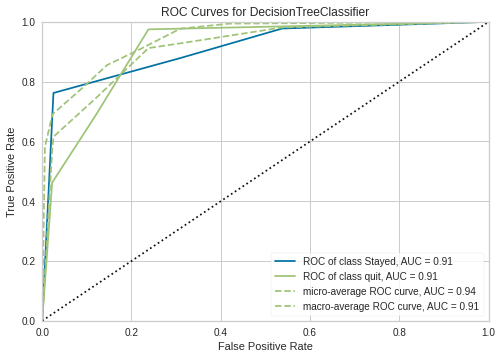

In [40]:
from yellowbrick.classifier import ROCAUC

model = ROCAUC(dtc, classes=['Stayed','quit'])
model.fit(X_train,y_train)
model.score(X_test,y_test)
model.poof()

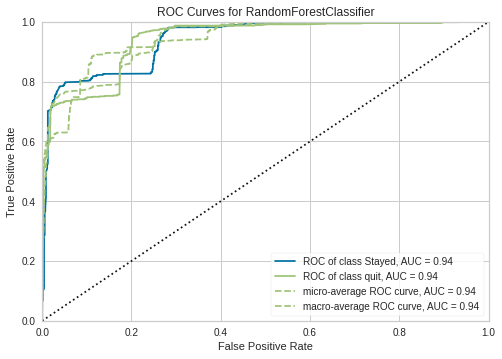

In [41]:
from yellowbrick.classifier import ROCAUC

model = ROCAUC(rfc, classes=['Stayed','quit'])
model.fit(X_train,y_train)
model.score(X_test,y_test)
model.poof()

Project Completed By : Santhosh TN.